In [228]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

with open('data2.json','r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, meta='title', record_path=['results'])

df['year'] = df['year'].astype(int)
df['income'] = df['income'].astype(int)
df['rating'] = pd.to_numeric(df['rating'])
df['metascore'] = pd.to_numeric(df['metascore'])/10

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               5 non-null      object 
 1   year               5 non-null      int64  
 2   genre              5 non-null      object 
 3   rating             5 non-null      float64
 4   income             5 non-null      int64  
 5   metascore          5 non-null      float64
 6   user review url    5 non-null      object 
 7   critic review url  5 non-null      object 
 8   users reviews      5 non-null      object 
 9   critics reviews    5 non-null      object 
 10  title              5 non-null      object 
dtypes: float64(2), int64(2), object(7)
memory usage: 568.0+ bytes


In [229]:
df = df[['title','year', 'rating', 'metascore', 'income', 'genre']]

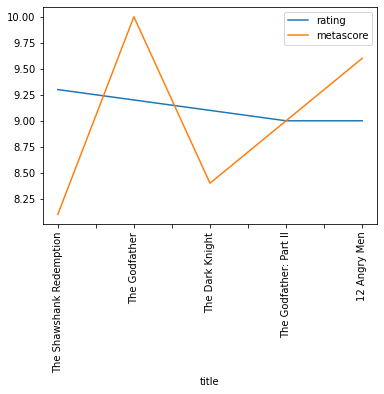

In [230]:
df.plot(x='title', y=['rating', 'metascore'], rot=90, fontsize=10)
plt.show()

<AxesSubplot:xlabel='genre'>

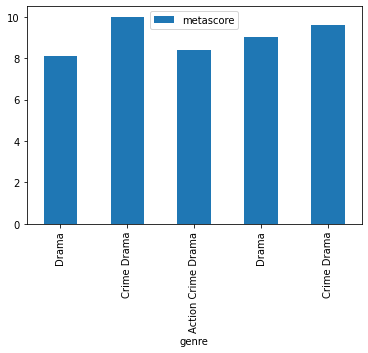

In [231]:
df.plot(x="genre", y="metascore", kind="bar", rot=90, fontsize=10)


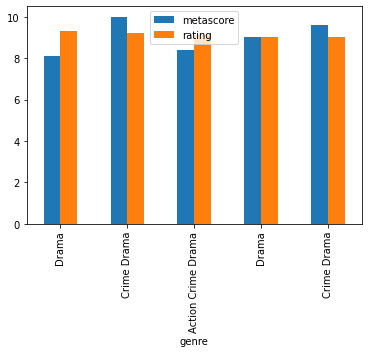

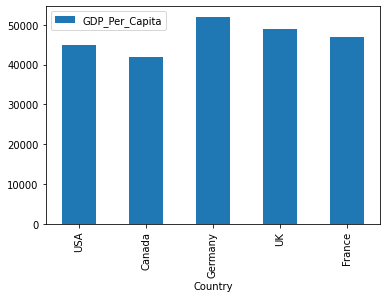

In [232]:
df.plot(x="genre", y=["metascore", "rating"], kind="bar")

data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }

df = pd.DataFrame(data,columns=['Country','GDP_Per_Capita'])
df.plot(x ='Country', y='GDP_Per_Capita', kind = 'bar')
plt.show()

In [233]:
from pandas import Series

df_dec = df[['genre', 'year', 'metascore', 'rating']]

s = df['genre'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'genre'
del df_dec['genre']
df_dec = df_dec.join(s)
#df_dec.plot(x="genre", y="year", kind="bar", rot=90, fontsize=10)

#df_dec.plot(x="genre", y=["metascore", "rating"], kind="bar")

df_dec = df_dec.groupby(["year", "genre"], sort=True)["year"].count()
print(df_dec)
d2 = df_dec.to_frame(name = 'genre count').reset_index()

print(d2)

KeyError: "None of [Index(['genre', 'year', 'metascore', 'rating'], dtype='object')] are in the [columns]"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = df['year']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()